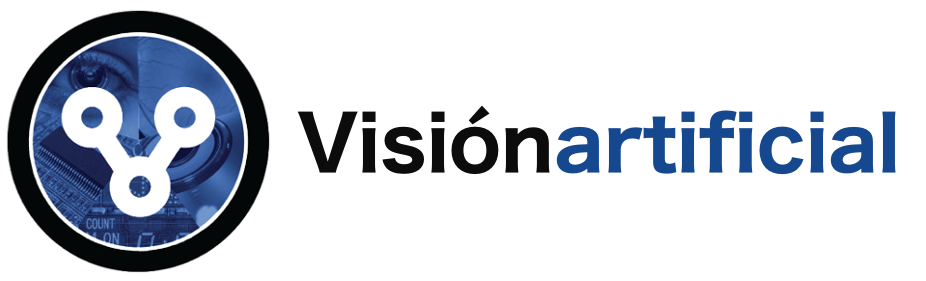

# OpenCV 

### para a materia de Visión Artificial do Grao de Robótica. EPSE de Lugo.

<hr style = "border: none; height: 4px; background-color: # D3D3D3" />

# <font style="color:rgb(50,120,229)">Detector de puntos ORB</font>

ORB, igual que BRISK, é unha extensión do detector de puntos clave FAST. Tamén utiliza unha pirámide de imaxes para ter en conta varias escalas; con todo, (e a diferenza de BRISK), ORB tamén engade invariancia de rotación.



# <font style="color:rgb(50,120,229)">Obxectivo:</font>
Neste caderno,  exploraremos o detector de puntos clave ORB como unah extensión de FAST robusta a escala e rotación.



# <font style="color:rgb(50,120,229)">Como funciona o detector de puntos clave BRISK?</font>

O detector de puntos clave ORB, introducido por Rublee et al. no seu artigo de 2011, [ORB: Unha alternativa eficiente a SIFT ou SURF](./artigos/rublee_2011.pdf), consta de tres pasos principais.

O primeiro paso é calcular o detector de puntos clave FAST en varias escalas da imaxe, como no detector de puntos clave BRISK. De novo, utilízase unha vecindade circular de 16 píxeles, onde 9 píxeles contiguos deben ser todos máis pequenos ou maiores que o píxel central. Se hai contiguidade, entón o píxel central marcarase como un punto clave.


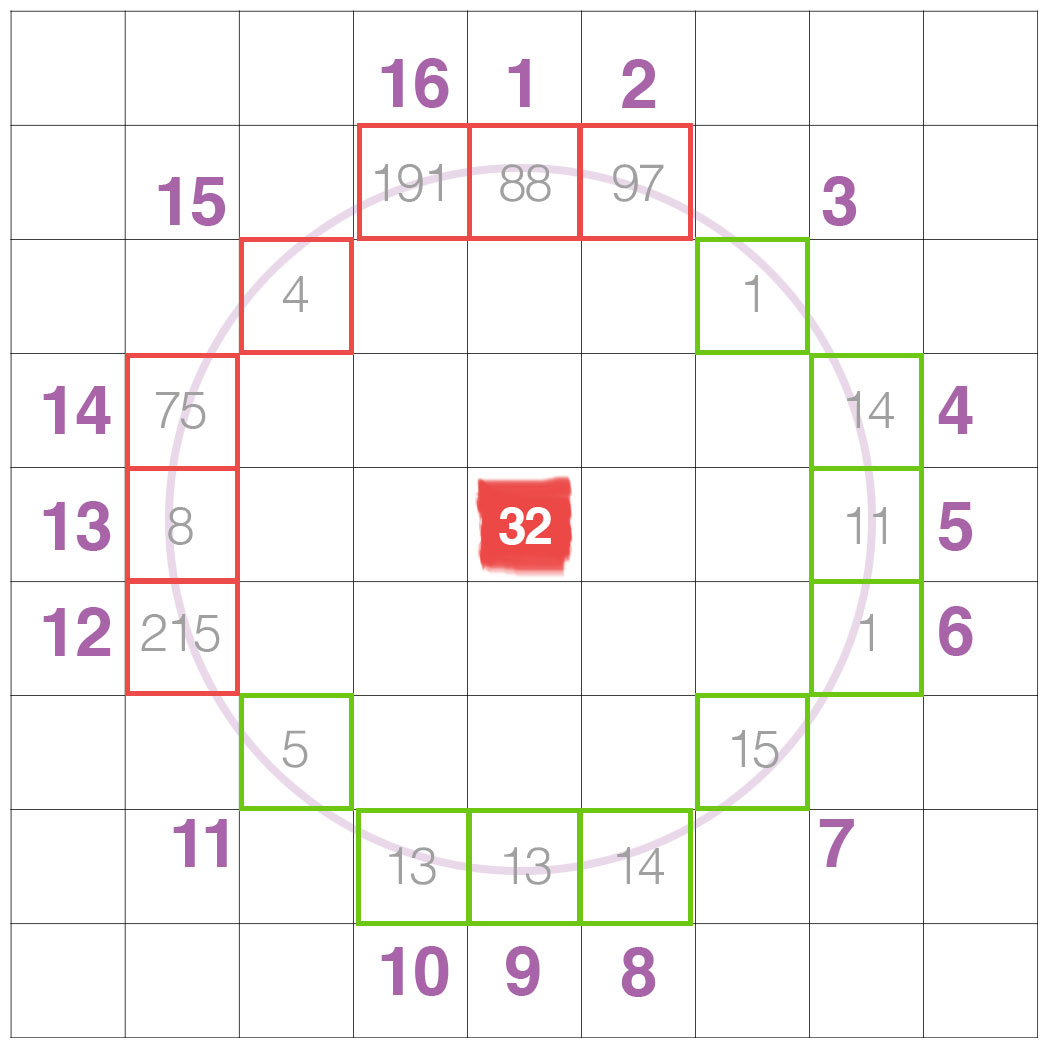

Despois, introdúcese un **segundo paso** para clasificar os puntos clave. Lembras cando falamos do detector de puntos clave Harris e introducimos unha función para medir a "esquina" dun punto clave? Ben, esa mesma función utilízase aquí no segundo paso do detector de puntos clave ORB. Todos os puntos clave reunidos en todas as escalas da pirámide de imaxes clasifícanse e ordénanse segundo a súa puntuación de puntos clave de Harris. Mantense un máximo de n=500 puntos e o resto descartaranse.

Finalmente, engádese a invariancia de rotación no **terceiro paso** de ORB. Aquí, examínase a rexión que rodea o centro do punto clave: este proceso de medición da orientación do punto clave chámase centroide de intensidade e é discutido na Sección 3.2 do Rublee et al. papel:
$m_{p,q} = \sum_{x,y}x^{p}y^{q}I(x, y)$

Esta ecuación úsase para obter o centroide do parche de imaxe:
$C = (m_{10}/m_{00}, m_{01}/m_{00})$

Usando o centroide de intensidade, o punto clave pódese xirar segundo o seu eixe dominante, garantindo que obtemos unha representación canónica da área que rodea o punto clave:
$\theta = arctan2(m_{01}, m_{10})$

Realizar esta rotación garante que, se o mesmo punto clave aparecese nunha imaxe pero foi xirado nalgún ángulo $\theta$, o mesmo punto clave non só podería detectarse, senón tamén describirse do mesmo xeito.

En resumo, o detector de puntos clave ORB está construído en FAST e comparte moitos puntos en común con BRISK, incluíndo a invariancia de escala. Non obstante, ORB dá un paso adicional e tamén proporciona invariancia de rotación.

ORB é un detector de puntos clave moi rápido e, do mesmo xeito que FAST e BRISK, é axeitado para aplicacións en tempo real.

Non obstante, ao desenvolver as túas propias aplicacións, raramente hai unha opción clara á hora de decidir entre FAST, BRISK e ORB. Todos os detectores teñen os seus méritos, e dado que todos teñen FAST no seu núcleo, producen resultados similares. A miña mellor suxestión é probar cada un deles e ver que detector che dá os mellores resultados.



## Que detecta ORB?

ORB, ao ser unha extensión de FAST, detecta esquinas, bordes ou ambos pero con robustez ao cambio de escala e rotacións na imaxe.


Vexamos como se poden obter estes puntos con OpenCV:

In [1]:
# importamos paquetes necesarios
from __future__ import print_function
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

# de keypoints: 500


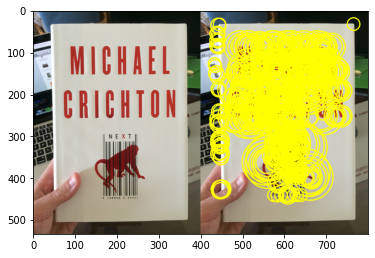

In [3]:
#cargamos a imaxe e pasamola a gris
image = cv2.imread("../data/next.png")
if image is None:
	print("Imaxe non atopada")
orig = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# detectamos os puntos clave de ORB OpenCV 3+
detector = cv2.ORB_create()
kps = detector.detect(gray, None)

print("# de keypoints: {}".format(len(kps)))

# lazo sobre os puntos clave e anotamolos cun circulo
for kp in kps:
	r = int(0.5 * kp.size)
	(x, y) = np.int0(kp.pt)
	cv2.circle(image, (x, y), r, (0, 255, 255), 2)
    
# Visualiamos a imaxe
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
plt.imshow(image);
plt.imshow(np.hstack([orig, image]));